In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../DSI-CHI-1/lessons/week-06/3.2-random-forests-lab/assets/datasets/imdb_p6_sample.csv')

In [5]:
df.head()

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


 Decision Tree Regressor
Train a decision tree regressor on the data and estimate the rating
Evaluate the score with a 3-fold shuffled cross validation
Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
They should align to a diagonal line.
Add some text to the plot indicating the average $R^2$ coefficient

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import KFold

In [7]:
# ignoring train test split for this one
y = df['rating']

In [9]:
x = df.drop(['HA', 'rating', 'tconst', 'title'], axis=1)
x.head()

,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1994,0,1,0,1,0,0,0,1
1,1972,1,1,0,0,1,0,1,0
2,1974,1,1,0,0,1,0,0,1
3,2008,1,1,1,0,1,0,1,1
4,1993,1,1,1,1,1,1,1,1


In [15]:
cv = KFold(len(df),n_folds=3, shuffle=True, random_state=42)

In [16]:
cv

sklearn.cross_validation.KFold(n=26, n_folds=3, shuffle=True, random_state=42)

In [17]:
# gives index for train and test sets. seeing what each fold will look like
# will fit model on each fold
i = 0

for item in cv:
    print item
    i += 1

(array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 17, 18, 19, 20, 21, 22, 25]), array([ 0,  1,  8,  9, 11, 13, 16, 23, 24]))
(array([ 0,  1,  6,  7,  8,  9, 10, 11, 13, 14, 16, 18, 19, 20, 23, 24, 25]), array([ 2,  3,  4,  5, 12, 15, 17, 21, 22]))
(array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 12, 13, 15, 16, 17, 21, 22, 23,
       24]), array([ 6,  7, 10, 14, 18, 19, 20, 25]))


In [18]:
y.as_matrix()

array([ 9.3,  9.2,  9. ,  9. ,  8.9,  8.9,  8.9,  8.9,  8.9,  8.9,  8.8,
        8.8,  8.8,  8.8,  8.7,  8.7,  8.7,  8.7,  8.7,  8.7,  8.7,  8.6,
        8.6,  8.6,  8.6,  8.6])

In [19]:
x.as_matrix()

array([[1994,    0,    1,    0,    1,    0,    0,    0,    1],
       [1972,    1,    1,    0,    0,    1,    0,    1,    0],
       [1974,    1,    1,    0,    0,    1,    0,    0,    1],
       [2008,    1,    1,    1,    0,    1,    0,    1,    1],
       [1993,    1,    1,    1,    1,    1,    1,    1,    1],
       [1957,    1,    0,    0,    0,    0,    0,    0,    0],
       [1994,    0,    0,    0,    0,    0,    0,    1,    0],
       [2003,    1,    0,    0,    1,    0,    0,    0,    1],
       [1966,    0,    0,    0,    0,    0,    1,    1,    0],
       [1999,    0,    1,    0,    0,    0,    1,    0,    0],
       [2001,    1,    1,    1,    1,    0,    0,    0,    0],
       [1980,    0,    0,    1,    0,    0,    0,    1,    0],
       [1994,    0,    0,    0,    0,    0,    1,    0,    0],
       [2010,    1,    0,    0,    0,    0,    0,    0,    0],
       [2002,    1,    1,    0,    0,    1,    1,    0,    0],
       [1975,    0,    0,    1,    1,    0,    0,    0,

In [22]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    decision_tree_regressor = DecisionTreeRegressor()
    decision_tree_regressor.fit(x_train, y_train)
    print decision_tree.score(x_test, y_test)

In [21]:
# this loop sets up train test sets
for training_set, test_set in cv:
    print y.as_matrix()[training_set]
    print y.as_matrix()[test_set]
    print '\n'

[ 9.   9.   8.9  8.9  8.9  8.9  8.8  8.8  8.7  8.7  8.7  8.7  8.7  8.7  8.6
  8.6  8.6]
[ 9.3  9.2  8.9  8.9  8.8  8.8  8.7  8.6  8.6]


[ 9.3  9.2  8.9  8.9  8.9  8.9  8.8  8.8  8.8  8.7  8.7  8.7  8.7  8.7  8.6
  8.6  8.6]
[ 9.   9.   8.9  8.9  8.8  8.7  8.7  8.6  8.6]


[ 9.3  9.2  9.   9.   8.9  8.9  8.9  8.9  8.8  8.8  8.8  8.7  8.7  8.7  8.6
  8.6  8.6  8.6]
[ 8.9  8.9  8.8  8.7  8.7  8.7  8.7  8.6]




In [24]:
for training_set, test_set in cv:
    x_train = x.as_matrix()[training_set]
    x_test = x.as_matrix()[test_set]
    y_train = y.as_matrix()[training_set]
    y_test = y.as_matrix()[test_set]
    print 'here is one fold of data'
    print x_train, x_test, y_train, y_test
    print '\n'

here is one fold of data
[[1974    1    1    0    0    1    0    0    1]
 [2008    1    1    1    0    1    0    1    1]
 [1993    1    1    1    1    1    1    1    1]
 [1957    1    0    0    0    0    0    0    0]
 [1994    0    0    0    0    0    0    1    0]
 [2003    1    0    0    1    0    0    0    1]
 [2001    1    1    1    1    0    0    0    0]
 [1994    0    0    0    0    0    1    0    0]
 [2002    1    1    0    0    1    1    0    0]
 [1975    0    0    1    1    0    0    0    0]
 [1999    0    0    1    0    0    0    0    1]
 [1954    0    1    0    1    0    0    1    0]
 [1977    1    0    1    0    0    1    0    0]
 [2002    1    0    1    0    0    0    0    0]
 [1995    1    1    0    0    0    1    0    1]
 [1991    0    0    0    0    0    0    0    1]
 [1997    1    0    1    0    0    0    0    0]] [[1994    0    1    0    1    0    0    0    1]
 [1972    1    1    0    0    1    0    1    0]
 [1966    0    0    0    0    0    1    1    0]
 [1999    0   

In [44]:
def fit_and_evaluate_model(x_train, x_test, 
                           y_train, y_test,
                          model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    plt.scatter(y_test, predictions)
    plt.plot([8,9,10], [8,9,10])
    plt.xlim((8,10))
    plt.ylim((8,10))
    plt.xlabel('actual y values')
    plt.ylabel('predicted y values')
    plt.show()
    return model.score(x_test, y_test)

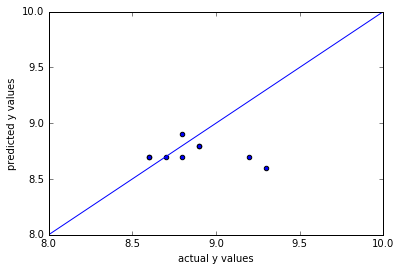

for fold 0, the score is: -0.666666666667


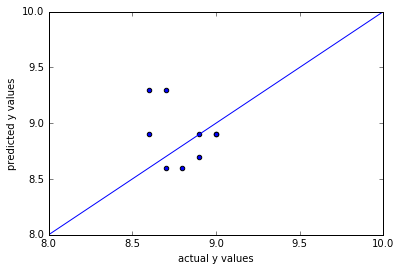

for fold 1, the score is: -4.25


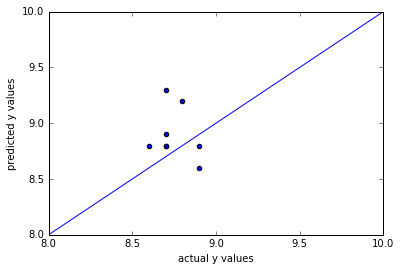

for fold 2, the score is: -8.0
the avg score is: -4.30555555556


In [45]:
counter = 0
set_of_scores = []

for training_set, test_set in cv:
    decision_tree = DecisionTreeRegressor()
    x_train = x.as_matrix()[training_set]
    x_test = x.as_matrix()[test_set]
    y_train = y.as_matrix()[training_set]
    y_test = y.as_matrix()[test_set]
    model_score = fit_and_evaluate_model(x_train, x_test, 
                                         y_train, y_test,
                                        decision_tree)
    print 'for fold %s, the score is: %s' % (counter, model_score)
    set_of_scores.append(model_score)
    counter += 1
    
print 'the avg score is: %s' % np.mean(set_of_scores)

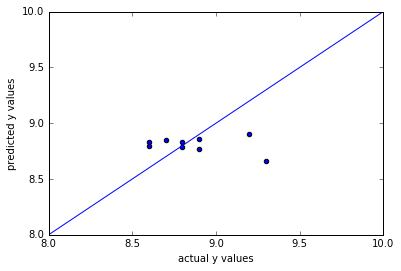

for fold 0, the score is: -0.321875


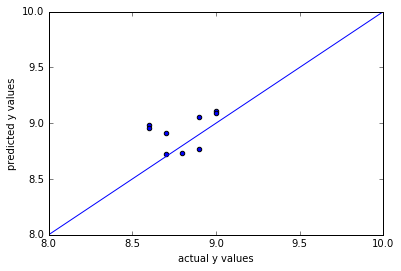

for fold 1, the score is: -0.9305


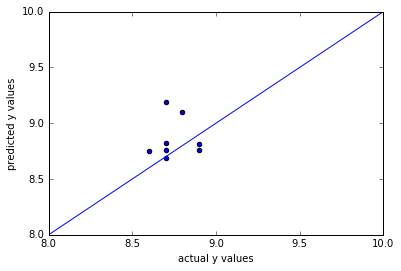

for fold 2, the score is: -3.98
the avg score is: -1.744125


In [46]:
counter = 0
set_of_scores = []

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

for training_set, test_set in cv:
    random_forest = RandomForestRegressor()
    x_train = x.as_matrix()[training_set]
    x_test = x.as_matrix()[test_set]
    y_train = y.as_matrix()[training_set]
    y_test = y.as_matrix()[test_set]
    model_score = fit_and_evaluate_model(x_train, x_test, 
                                         y_train, y_test,
                                        random_forest)
    
    print 'for fold %s, the score is: %s' % (counter, model_score)
    set_of_scores.append(model_score)
    counter += 1
    
print 'the avg score is: %s' % np.mean(set_of_scores)